# LIFE EXPECTANCY PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

# Load Dataset

In [2]:
df=pd.read_csv('C:\\Users\\Sarang K\\Downloads\\Life Expectancy Data.csv')
print(df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

# Exploratory Data Analysis

In [3]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
df.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.duplicated().any()

np.False_

In [9]:
df.drop(columns=['Population',' thinness  1-19 years',' thinness 5-9 years','Schooling','Country','Year','Alcohol',
                 'percentage expenditure','Hepatitis B','Measles ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS'])

,Status,Life expectancy,Adult Mortality,infant deaths,BMI,GDP,Income composition of resources
0,Developing,65.0,263.0,62,19.1,584.259210,0.479
1,Developing,59.9,271.0,64,18.6,612.696514,0.476
2,Developing,59.9,268.0,66,18.1,631.744976,0.470
3,Developing,59.5,272.0,69,17.6,669.959000,0.463
4,Developing,59.2,275.0,71,17.2,63.537231,0.454
...,...,...,...,...,...,...,...
2933,Developing,44.3,723.0,27,27.1,454.366654,0.407
2934,Developing,44.5,715.0,26,26.7,453.351155,0.418
2935,Developing,44.8,73.0,25,26.3,57.348340,0.427
2936,Developing,45.3,686.0,25,25.9,548.587312,0.427


In [10]:
df.fillna(df[['Life expectancy ','Adult Mortality',' BMI ','GDP','Income composition of resources']].mean(),inplace=True)

In [11]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                          163
dtype: int64

# Split Dataset

In [12]:
X=df[['Adult Mortality','infant deaths',' BMI ',' HIV/AIDS','GDP','Income composition of resources']]
y=df['Life expectancy ']

In [13]:
print(X)

      Adult Mortality  infant deaths   BMI    HIV/AIDS         GDP  \
0               263.0             62   19.1        0.1  584.259210   
1               271.0             64   18.6        0.1  612.696514   
2               268.0             66   18.1        0.1  631.744976   
3               272.0             69   17.6        0.1  669.959000   
4               275.0             71   17.2        0.1   63.537231   
...               ...            ...    ...        ...         ...   
2933            723.0             27   27.1       33.6  454.366654   
2934            715.0             26   26.7       36.7  453.351155   
2935             73.0             25   26.3       39.8   57.348340   
2936            686.0             25   25.9       42.1  548.587312   
2937            665.0             24   25.5       43.5  547.358878   

      Income composition of resources  
0                               0.479  
1                               0.476  
2                               0.470  

In [14]:
print(y)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64


# DATA VISUALIZATION

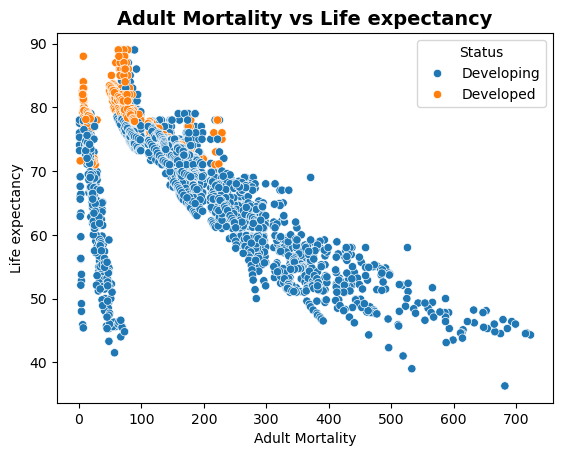

In [15]:
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', hue='Status',data=df)
plt.title('Adult Mortality vs Life expectancy',fontsize=14, fontweight= 'bold')
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')
plt.show()

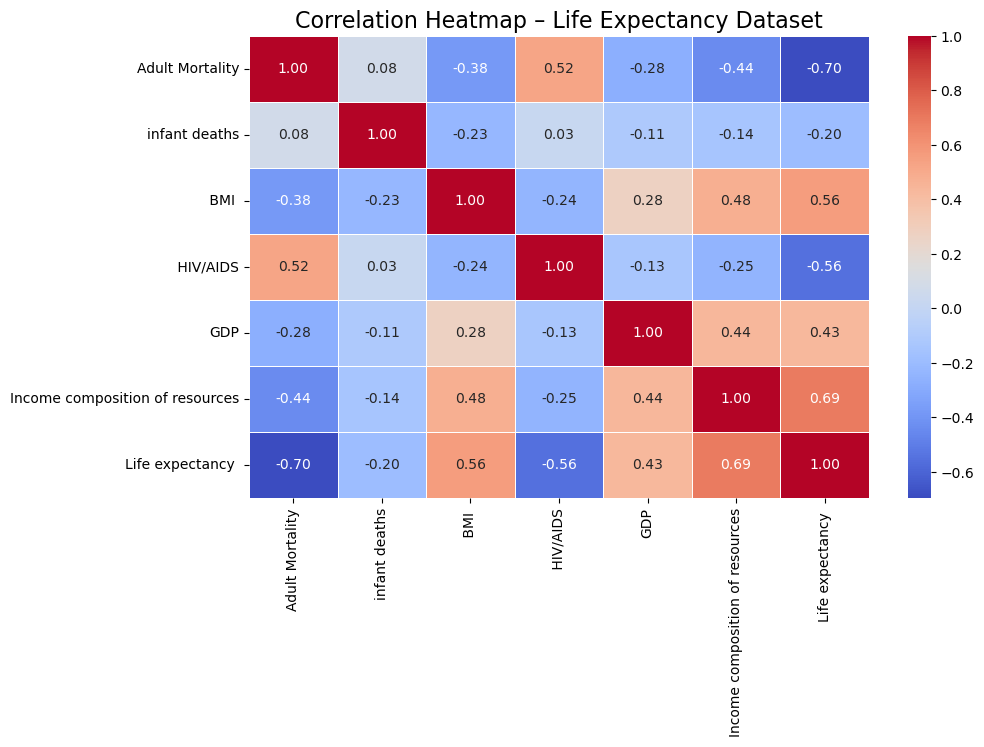

In [16]:
cols = ['Adult Mortality','infant deaths',' BMI ',' HIV/AIDS','GDP','Income composition of resources','Life expectancy ']
df_selected = df[cols]

plt.figure(figsize=(10, 6))
corr = df_selected.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap – Life Expectancy Dataset",fontsize=16)
plt.show()

# Model Training & Testing

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 1. LINEAR REGRESSION

In [18]:
Model_1=LinearRegression()
Model_1.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred1=Model_1.predict(X_test)

In [20]:
r1=Model_1.score(X_test,y_test)
mse1=mean_squared_error(y_test,y_pred1)
rmse1=root_mean_squared_error(y_test,y_pred1)
mae1=mean_absolute_error(y_test,y_pred1)
mape1=mean_absolute_percentage_error(y_test,y_pred1)

In [21]:
print(f"\nR2 Score by LinearRegression = {r1}")
print(f"Mean squared error = {mse1}")
print(f"Root mean squared error = {rmse1}")
print(f"Mean absolute error = {mae1}")
print(f"Mean absolute percentage error = {mape1}\n")


R2 Score by LinearRegression = 0.7353708286506043
Mean squared error = 22.926221537634067
Root mean squared error = 4.788133408504202
Mean absolute error = 3.387827363353291
Mean absolute percentage error = 0.05241542338833659



# 2. DECISION TREE REGRESSION

In [22]:
Model_2=DecisionTreeRegressor(max_depth=4,random_state=42)
Model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [23]:
y_pred2=Model_2.predict(X_test)

In [24]:
r2=Model_2.score(X_test,y_test)
mse2=mean_squared_error(y_test,y_pred2)
rmse2=root_mean_squared_error(y_test,y_pred2)
mae2=mean_absolute_error(y_test,y_pred2)
mape2=mean_absolute_percentage_error(y_test,y_pred2)

In [25]:
print(f"\nR2 Score by DecisionTree Regressor = {r2}")
print(f"Mean squared error = {mse2}")
print(f"Root mean squared error = {rmse2}")
print(f"Mean absolute error = {mae2}")
print(f"Mean absolute percentage error = {mape2}\n")


R2 Score by DecisionTree Regressor = 0.864184789770983
Mean squared error = 11.766388346429359
Root mean squared error = 3.4302169532595688
Mean absolute error = 2.547351003391296
Mean absolute percentage error = 0.0385610089902063



# 3. RANDOM FOREST REGRESSION

In [26]:
Model_3=RandomForestRegressor(n_estimators=100,random_state=42)
Model_3.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred3=Model_3.predict(X_test)

In [28]:
r3=Model_3.score(X_test,y_test)
mse3=mean_squared_error(y_test,y_pred3)
rmse3=root_mean_squared_error(y_test,y_pred3)
mae3=mean_absolute_error(y_test,y_pred3)
mape3=mean_absolute_percentage_error(y_test,y_pred3)

In [29]:
print(f"\nR2 Score by RandomForest Regressor = {r3}")
print(f"Mean squared error = {mse3}")
print(f"Root mean squared error = {rmse3}")
print(f"Mean absolute error = {mae3}")
print(f"Mean absolute percentage error = {mape3}\n")


R2 Score by RandomForest Regressor = 0.9636626347730758
Mean squared error = 3.1480976985203712
Root mean squared error = 1.7742879412655577
Mean absolute error = 1.182619550620792
Mean absolute percentage error = 0.017619775846699548



# COMPARING R2 SCORE

In [30]:
print(f"R2 Score by LinearRegression = {r1}")
print(f"R2 Score by DecisionTreeRegression = {r2}")
print(f"R2 Score by RandomForestRegression = {r3}")

R2 Score by LinearRegression = 0.7353708286506043
R2 Score by DecisionTreeRegression = 0.864184789770983
R2 Score by RandomForestRegression = 0.9636626347730758


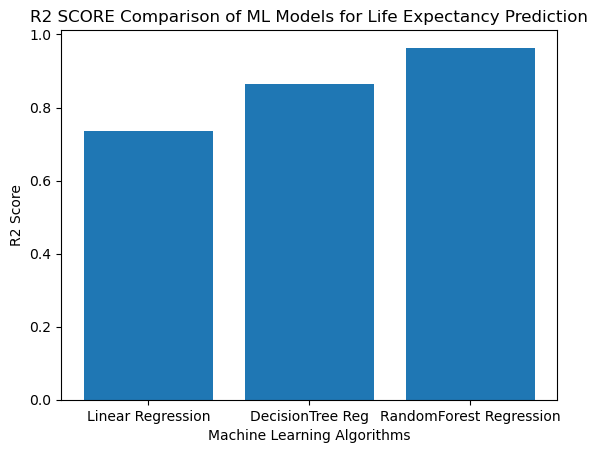

In [31]:
models=['Linear Regression','DecisionTree Reg','RandomForest Regression']
r2_score=[r1,r2,r3]
plt.figure()
plt.bar(models,r2_score)
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("R2 Score")
plt.title("R2 SCORE Comparison of ML Models for Life Expectancy Prediction")
plt.show()

In [32]:
!pip install gradio
import gradio as gr

In [33]:
def predict_life_expectancy(
    adult_mortality,
    infant_deaths,
    bmi,
    hiv_aids,
    gdp,
    income_composition
):
    features = np.array([[
    adult_mortality,
    infant_deaths,
    bmi,
    hiv_aids,
    gdp,
    income_composition
    ]])

    prediction = Model_3.predict(features)[0]
    return f"Predicted Life Expectancy: {prediction:.2f} years"

In [34]:
iface = gr.Interface(
    fn=predict_life_expectancy,
    inputs=[
        gr.Number(label="Adult Mortality"),
        gr.Number(label="Infant Deaths"),
        gr.Number(label="BMI"),
        gr.Number(label="HIV/AIDS"),
        gr.Number(label="GDP"),
        gr.Number(label="Income Composition of Resources")
    ],
    outputs="text",
    title="Life Expectancy Prediction",
    description="Predict life expectancy using health, economic, and demographic indicators."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
